In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/netflix_titles.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.shape

(8807, 12)

In [10]:
df.size

105684

In [11]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
new_df = df

In [14]:
new_df.shape

(8807, 12)

In [13]:
new_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [15]:
new_df.drop_duplicates(inplace = True)

In [16]:
new_df.shape

(8807, 12)

In [19]:
new_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
new_df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

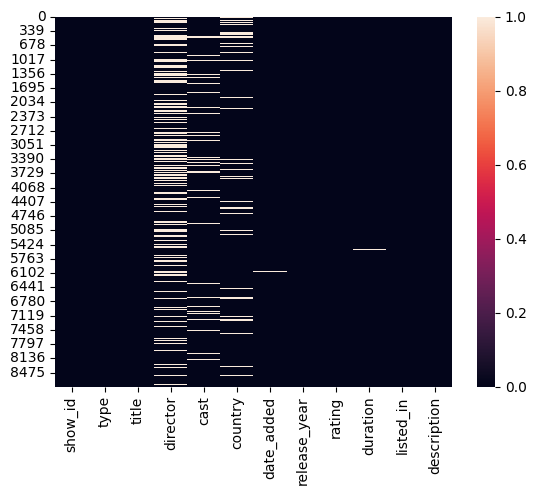

In [22]:
sns.heatmap(new_df.isna())

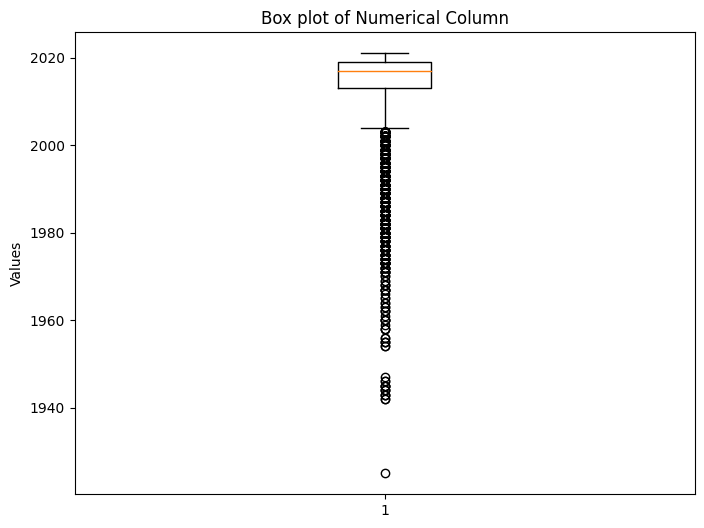

In [26]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['release_year'])
plt.title('Box plot of Numerical Column')
plt.ylabel('Values')
plt.show()

In [29]:
z_scores = np.abs((new_df['release_year'] - new_df['release_year'].mean()) / new_df['release_year'].std())

In [30]:
z_scores

0       0.659893
1       0.773281
2       0.773281
3       0.773281
4       0.773281
          ...   
8802    0.814145
8803    0.433118
8804    0.587370
8805    0.927532
8806    0.092955
Name: release_year, Length: 8807, dtype: float64

In [31]:
threshold = 3


In [33]:
outliers_removed_df = new_df[z_scores <= threshold]


In [34]:
print("Original DataFrame shape:", df.shape)


Original DataFrame shape: (8807, 12)


In [35]:
print("Outlier-removed DataFrame shape:", outliers_removed_df.shape)

Outlier-removed DataFrame shape: (8590, 12)


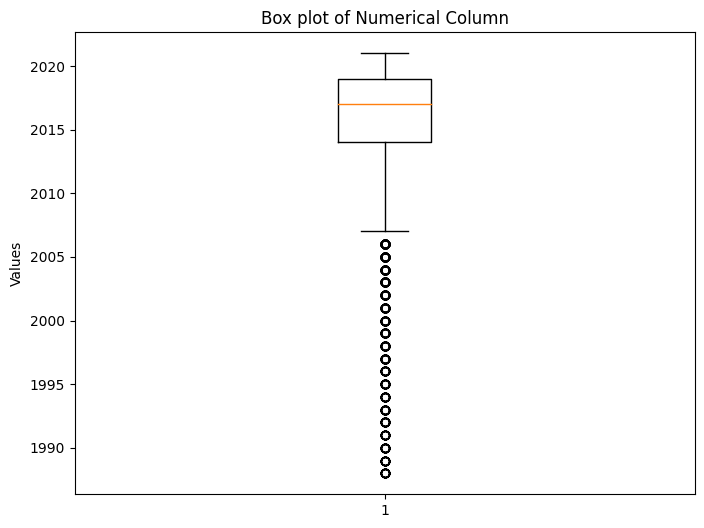

In [37]:
plt.figure(figsize=(8, 6))
plt.boxplot(outliers_removed_df['release_year'])
plt.title('Box plot of Numerical Column')
plt.ylabel('Values')
plt.show()